In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import clear_output

In [17]:
def get_data():
  df = pd.read_csv('ecommerce_data.csv')
  data = df.as_matrix() #convert to numpy array
  # shuffle it
  np.random.shuffle(data)

  # split features and labels
  X = data[:,:-1] # till the last column
  Y = data[:,-1].astype(np.int32)

  # one-hot encode the categorical data
  # create a new matrix X2 with the correct number of columns
  N, D = X.shape
  X2 = np.zeros((N, D+3))
  X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

  # one-hot
  for n in range(N):
      t = int(X[n,D-1])
      X2[n,t+D-1] = 1

  # assign X2 back to X, since we don't need original anymore
  X = X2
  Split=50
  # split train and test
  Xtrain = X[:-Split]
  Ytrain = Y[:-Split]
  Xtest = X[-Split:]
  Ytest = Y[-Split:]

  # normalize columns 1 and 2
  for i in (1, 2):
    m = Xtrain[:,i].mean()
    s = Xtrain[:,i].std()
    Xtrain[:,i] = (Xtrain[:,i] - m) / s
    Xtest[:,i] = (Xtest[:,i] - m) / s

  return Xtrain, Ytrain, Xtest, Ytest

In [19]:
def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [21]:
#calculations in the feedforward network
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2), Z

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

In [22]:
# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)
# cross entropy
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY))

In [23]:
# main training loop
def main():
    # get the data
    Xtrain, Ytrain, Xtest, Ytest = get_data()
    D = Xtrain.shape[1]
    K = len(set(Ytrain) | set(Ytest))
    M = 15 # num hidden units
    # convert to indicator
    Ytrain_ind = y2indicator(Ytrain, K)
    Ytest_ind = y2indicator(Ytest, K)

    # randomly initialize weights
    W1 = np.random.randn(D, M)
    b1 = np.zeros(M)
    W2 = np.random.randn(M, K)
    b2 = np.zeros(K)
    
    train_costs=[]
    test_costs=[]
    learning_rate=0.0001
    for i in range(100001):
        pYtrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)
        pYtest, Ztest = forward(Xtest, W1, b1, W2, b2)
        ctrain=cross_entropy(Ytrain_ind,pYtrain)
        ctest=cross_entropy(Ytest_ind,pYtest)
        train_costs.append(ctrain)
        test_costs.append(ctest)
        
        # gradient descent
        W2 -= learning_rate*Ztrain.T.dot(pYtrain - Ytrain_ind)
        b2 -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
        dZ = (pYtrain - Ytrain_ind).dot(W2.T) * (1 - Ztrain*Ztrain)
        W1 -= learning_rate*Xtrain.T.dot(dZ)
        b1 -= learning_rate*dZ.sum(axis=0)
        if i%1000==0:
            clear_output(wait=True)
            print("loop: ",i,"\ntraining cost: ",ctrain,"\ntesting cost: ",ctest)
            print("Final train classification_rate:", classification_rate(Ytrain, predict(pYtrain)))
            print("Final test classification_rate:", classification_rate(Ytest, predict(pYtest)))
    legend1, = plt.plot(train_costs, label='train cost')
    legend2, = plt.plot(test_costs, label='test cost')
    plt.legend([legend1, legend2])
    plt.show()


loop:  100000 
training cost:  0.00138662671084 
testing cost:  0.0381460150384
Final train classification_rate: 1.0
Final test classification_rate: 0.92


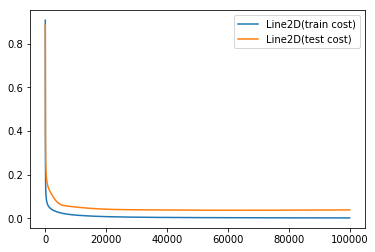

In [24]:
if __name__ == '__main__':
    main()